In [1]:
# Set global utool flags
import utool as ut
ut.util_io.__PRINT_WRITES__ = False
ut.util_io.__PRINT_READS__ = False
ut.util_parallel.__FORCE_SERIAL__ = True
ut.util_cache.VERBOSE_CACHE = False
ut.NOT_QUIET = False

# Matplotlib stuff
%pylab inline
%load_ext autoreload
%autoreload

# Define database for this test run
import ibeis
db = 'PZ_Master1'
#db = 'GZ_ALL'
#db = 'NNP_MasterGIRM_core'
 
# Setup database specific configs
if db == 'PZ_MTEST' or db == 'GZ_ALL':
    seperability_annot_cfgs = ['ctrl']
else:
    seperability_annot_cfgs = ['timequalctrl']

if db == 'PZ_Master1':
    varysize = ['varysize_pzm']
    varypername = ['varypername_pzm']
elif db == 'GZ_ALL':
    varysize = ['varysize_gz']
    varypername = ['varypername_gz']
elif db == 'NNP_MasterGIRM_core':
    varysize = ['varysize_girm']
    varypername = ['varypername_girm']

`%matplotlib` prevents importing * from pylab and numpy
/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Baseline Experiments

Equivalent Command Line:
ibeis -e rank_cdf --db PZ_Master1 -a unctrl ctrl::unctrl:qpername=1,qview_ext=0 -t baseline --show

[ibs.__init__] new IBEISController
[ibs._init_dirs] ibs.dbdir = '/media/raid/work/PZ_Master1'
[ibs.__init__] END new IBEISController



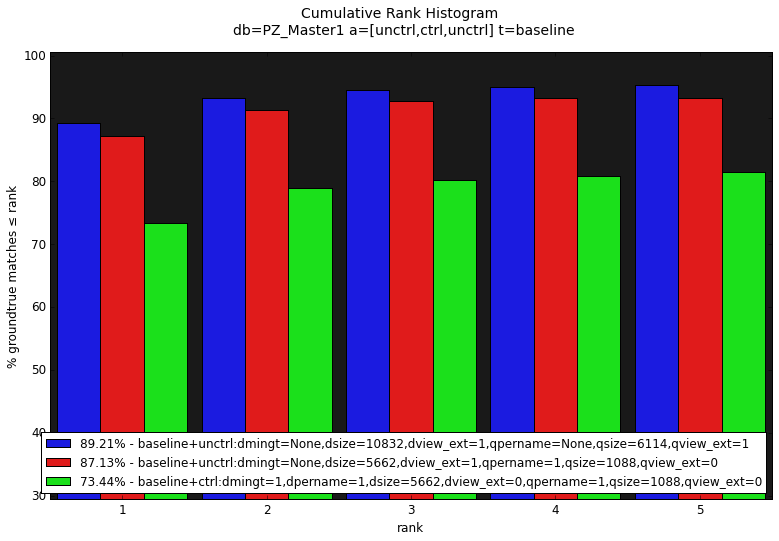

In [2]:
test_result = ibeis.run_experiment(
    e='rank_cdf', 
    db=db, 
    a=['unctrl', 'ctrl::unctrl:qpername=1,qview_ext=0'],
    t=['baseline'])
#test_result.print_unique_annot_config_stats()
_ = test_result.draw_func()

Equivalent Command Line:
ibeis -e timedelta_hist --db PZ_Master1 -a ctrl::unctrl:qpername=1,qview_ext=0 -t baseline --show


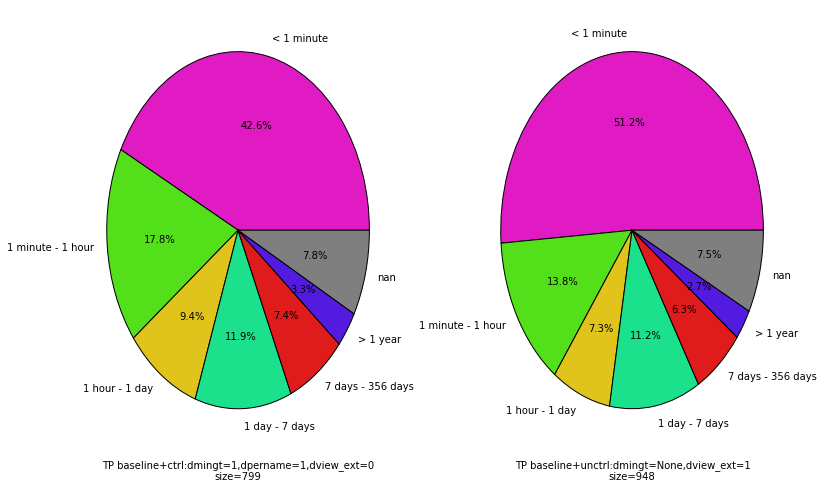

In [3]:
# Baseline Timedeltas FP
test_result = ibeis.run_experiment(
    e='timedelta_hist',
    db=db, 
    a=['ctrl::unctrl:qpername=1,qview_ext=0'], 
    t=['baseline'],
    truepos=True)
test_result.draw_func()

Equivalent Command Line:
ibeis -e timedelta_hist --db PZ_Master1 -a ctrl::unctrl:qpername=1,qview_ext=0 -t baseline --show


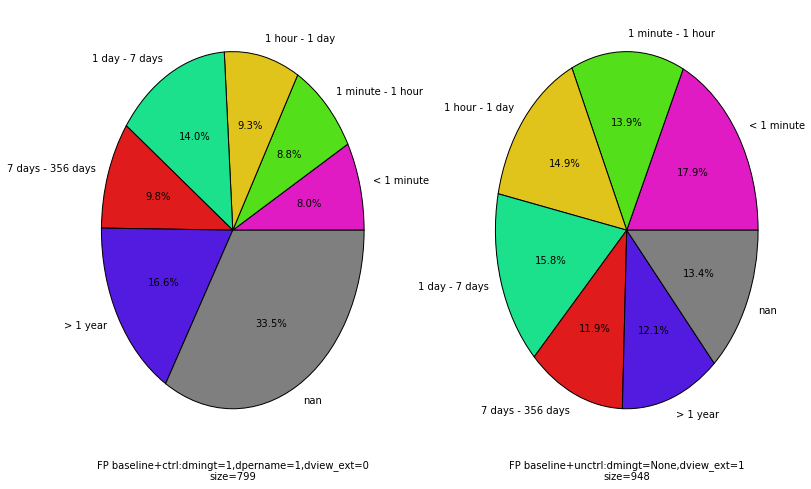

In [4]:
# Baseline Timedeltas FP
test_result = ibeis.run_experiment(
    e='timedelta_hist',
    db=db, 
    a=['ctrl::unctrl:qpername=1,qview_ext=0'], 
    t=['baseline'],
    falsepos=True)
test_result.draw_func()

Equivalent Command Line:
ibeis -e rank_cdf --db PZ_Master1 -a largetimedelta ctrl -t baseline --show


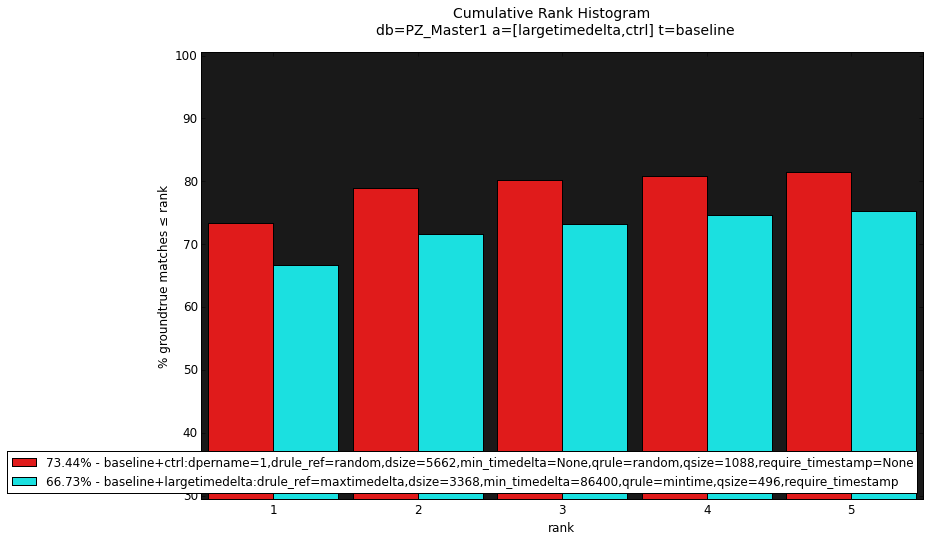

In [5]:
# Time Experiment 
test_result = ibeis.run_experiment(
    e='rank_cdf',
    db=db, 
    a=['largetimedelta', 'ctrl'], 
    t=['baseline'])
test_result.draw_func()

Equivalent Command Line:
ibeis -e timedelta_hist --db PZ_Master1 -a largetimedelta -t baseline --show


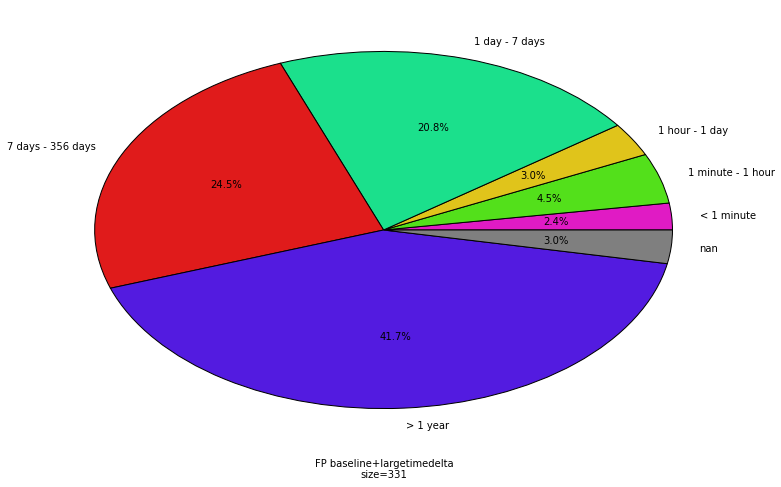

In [6]:
# Timedelta PIE for new False Pos 
test_result = ibeis.run_experiment(
    e='timedelta_hist',
    db=db, 
    a=['largetimedelta'], 
    t=['baseline'],
    falsepos=True)
test_result.draw_func()

# Database Size Experiments

Equivalent Command Line:
ibeis -e rank_surface --db PZ_Master1 -a varysize_pzm -t candidacy_k --show


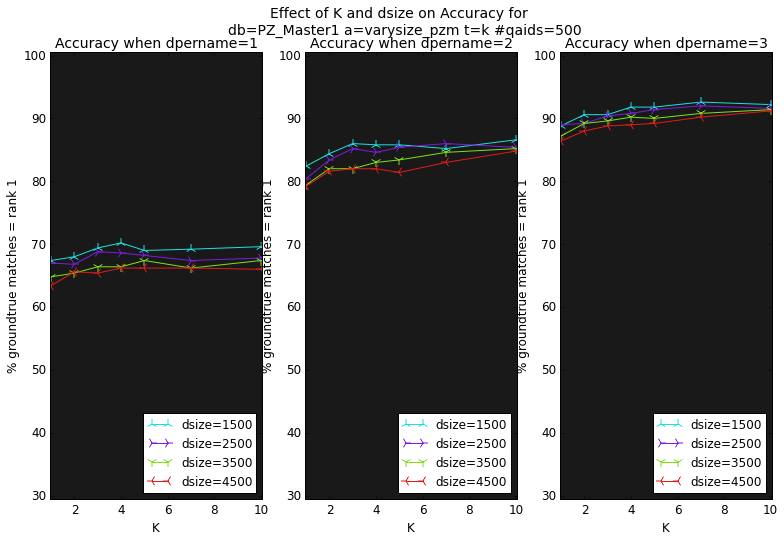

In [7]:
# K Experiment 
test_result = ibeis.run_experiment(
    e='rank_surface',
    db=db, 
    a=varysize, 
    t=['candidacy_k'])
#test_result.print_unique_annot_config_stats()
test_result.draw_func()

# Scoring Mechanism Experiments

Equivalent Command Line:
ibeis -e rank_cdf --db PZ_Master1 -a varypername_pzm -t candidacy_namescore --show


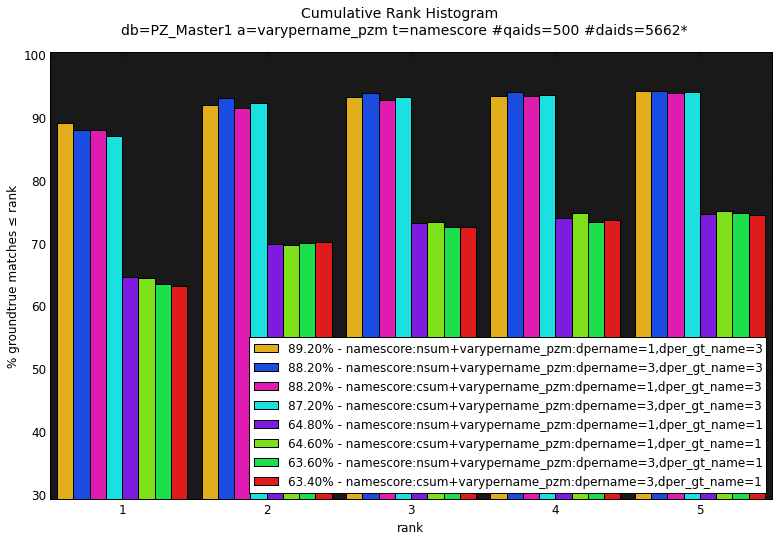

In [8]:
# Namescore Experiment
test_result = ibeis.run_experiment(
    e='rank_cdf',
    db=db, 
    a=varypername, 
    t=['candidacy_namescore'])
test_result.draw_func()

# Viewpoint Experiments

Equivalent Command Line:
ibeis -e rank_cdf --db PZ_Master1 -a viewpoint_compare -t baseline --show


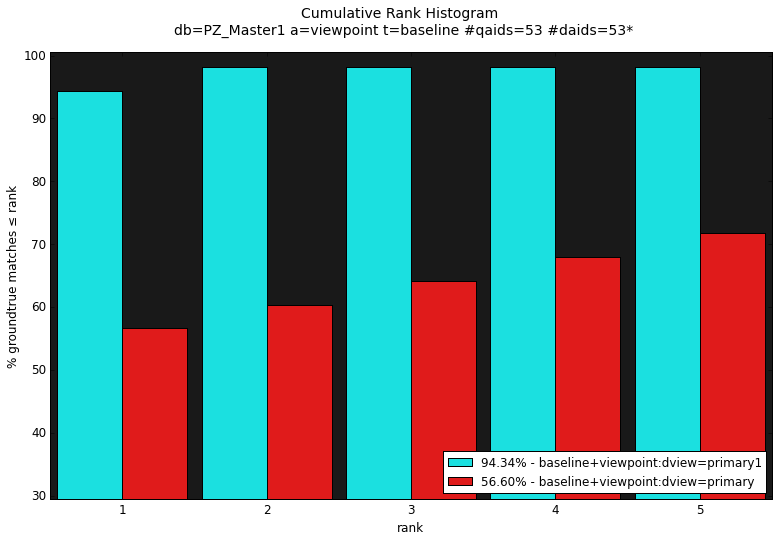

In [9]:
try:
    test_result = ibeis.run_experiment(
        e='rank_cdf',
        db=db, 
        a=['viewpoint_compare'], 
        t=['baseline'])
    test_result.draw_func()
except AssertionError as ex:
    ut.printex(ex, 'Database does not support this test')

# Invariance Experiments

Equivalent Command Line:
ibeis -e rank_cdf --db PZ_Master1 -a ctrl -t candidacy_invariance --show


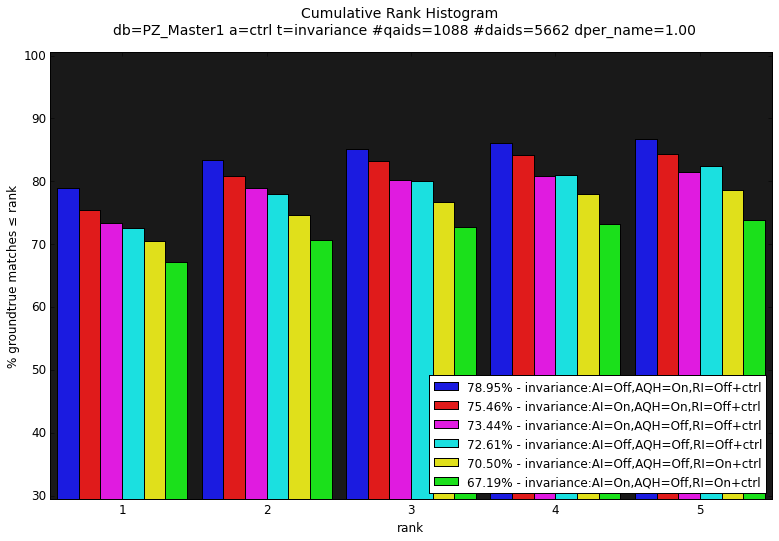

In [10]:
test_result = ibeis.run_experiment(
    e='rank_cdf',
    db=db, 
    a=['ctrl'], 
    t=['candidacy_invariance'])
test_result.draw_func()

Equivalent Command Line:
ibeis -e rank_cdf --db PZ_Master1 -a viewpoint_compare -t candidacy_invariance --test_cfgx_slice 6:: --show
test_cfgx_slice = slice(6, None, None)


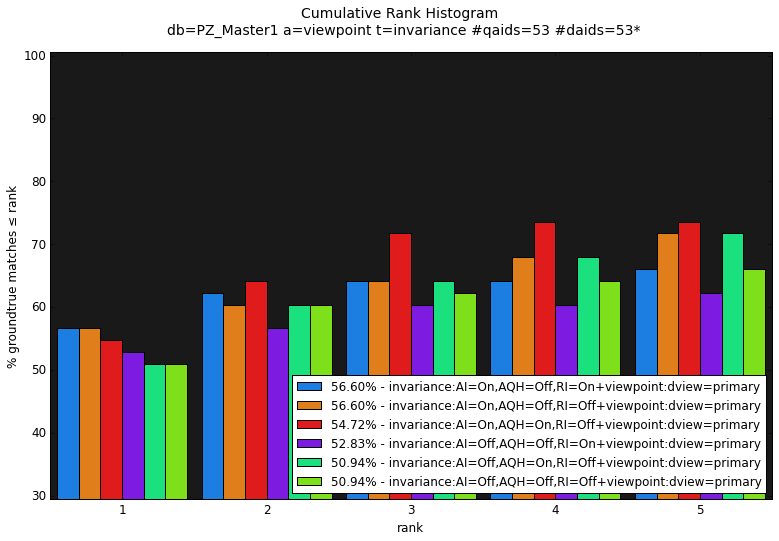

In [11]:
# Invariance + Viewpoint Experiment
try:
    test_result = ibeis.run_experiment(
        e='rank_cdf',
        db=db, 
        a=['viewpoint_compare'], 
        t=['candidacy_invariance'], 
        test_cfgx_slice=slice(6, None))
    test_result.draw_func()
except AssertionError as ex:
    ut.printex(ex, 'Database does not support this test')

Equivalent Command Line:
ibeis -e rank_cdf --db PZ_Master1 -a timectrl -t baseline:AQH=False,AI=True baseline:AQH=True,AI=False baseline:AQH=False,AI=False --show


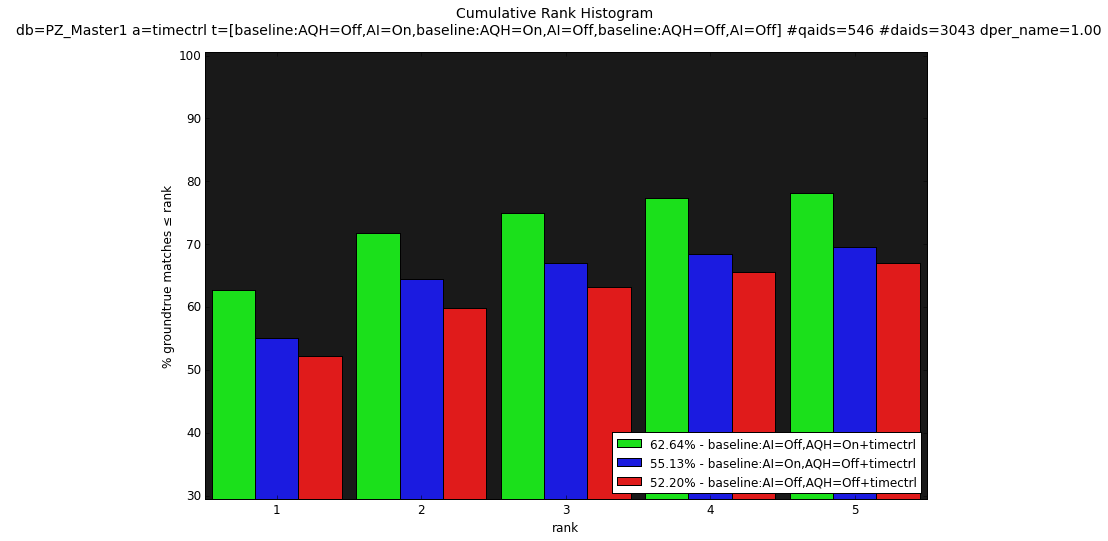

In [12]:
# Invariance + Time Experiment
test_result = ibeis.run_experiment(
    e='rank_cdf',
    db=db, 
    a=['timectrl'], 
    t=['baseline:AQH=False,AI=True',
       'baseline:AQH=True,AI=False',
       'baseline:AQH=False,AI=False'])
_ = test_result.draw_func()

Equivalent Command Line:
ibeis -e rank_cdf --db PZ_Master1 -a timequalctrl -t baseline:AQH=False,AI=True baseline:AQH=True,AI=False baseline:AQH=False,AI=False --show


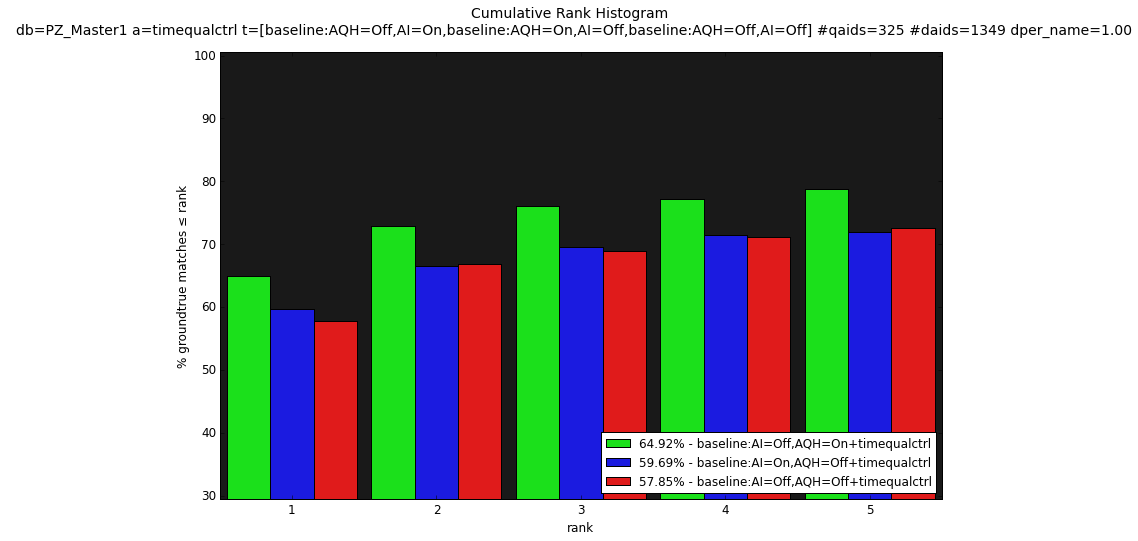

In [13]:
# Invariance + Time Experiment
test_result = ibeis.run_experiment(
    e='rank_cdf',
    db=db, 
    a=seperability_annot_cfgs, 
    t=['baseline:AQH=False,AI=True',
       'baseline:AQH=True,AI=False',
       'baseline:AQH=False,AI=False'])
_ = test_result.draw_func()

# Score Seperability Experiments

## Success Cases

Equivalent Command Line:
ibeis -e scores --db PZ_Master1 -a timequalctrl -t invarbest -f :fail=False,min_gf_timedelta=None --show


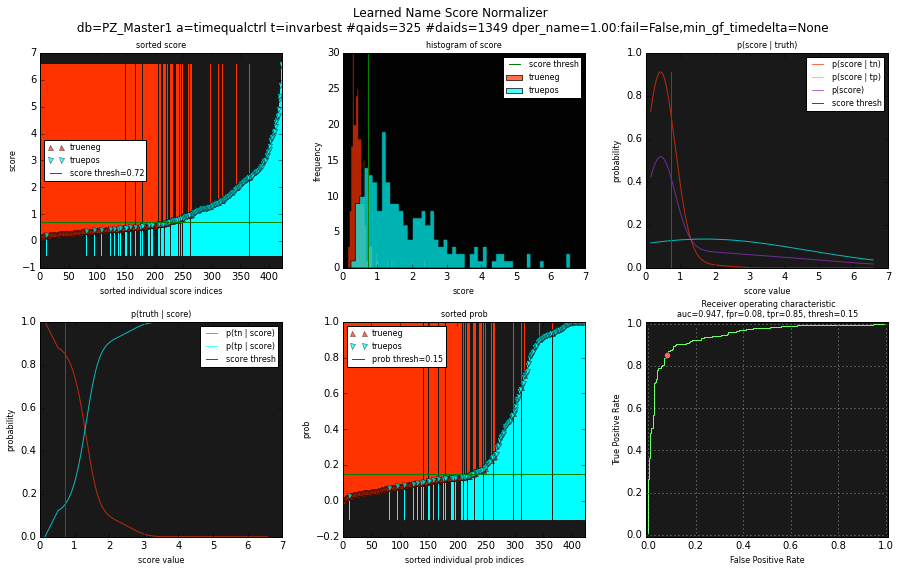

In [14]:
# Score Seperability of Good Cases
test_result = ibeis.run_experiment(
    e='scores',
    db=db, 
    a=seperability_annot_cfgs, 
    t=['invarbest'],
    f=[':fail=False,min_gf_timedelta=None'],
)
_ = test_result.draw_func()

## All Cases

Equivalent Command Line:
ibeis -e scores --db PZ_Master1 -a timequalctrl -t invarbest -f :fail=None,min_gf_timedelta=None --show


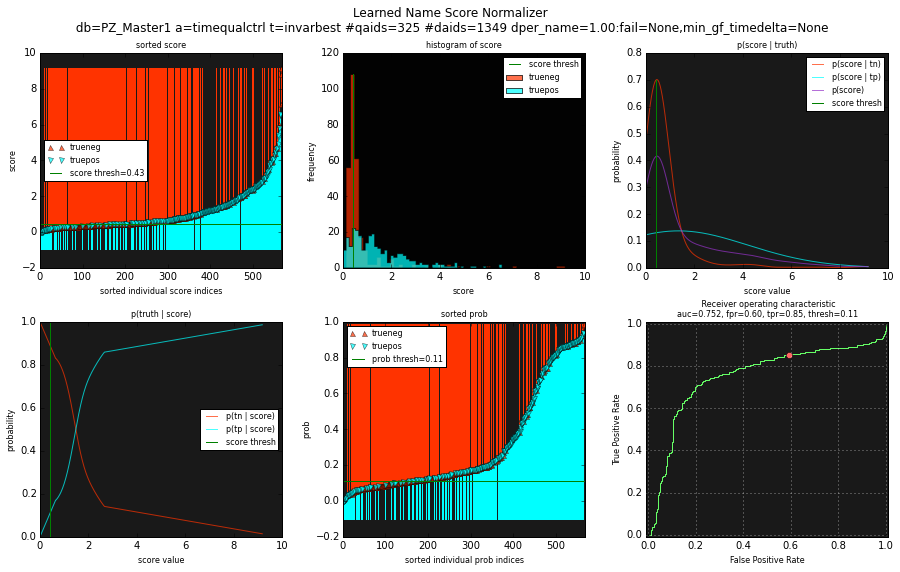

In [15]:
# Score Seperability with NO FILTERING
test_result = ibeis.run_experiment(
    e='scores',
    db=db, 
    a=seperability_annot_cfgs, 
    t=['invarbest'],
    f=[':fail=None,min_gf_timedelta=None']
)
_ = test_result.draw_func()

Equivalent Command Line:
ibeis -e taghist --db PZ_Master1 -a timequalctrl -t invarbest -f :fail=None,min_gf_timedelta=None --show


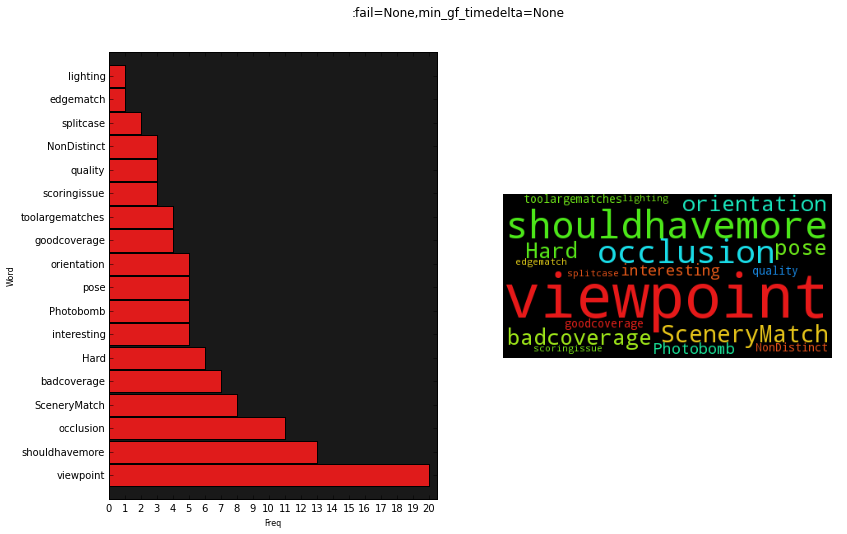

In [16]:
test_result = ibeis.run_experiment(
    e='taghist',
    db=db, 
    a=seperability_annot_cfgs, 
    t=['invarbest'],
    f=[':fail=None,min_gf_timedelta=None']
)
_ = test_result.draw_func()

## Success cases with large timedelta for groundfalse cases

Equivalent Command Line:
ibeis -e scores --db PZ_Master1 -a timequalctrl -t invarbest -f :fail=False,min_gf_timedelta=12h --show


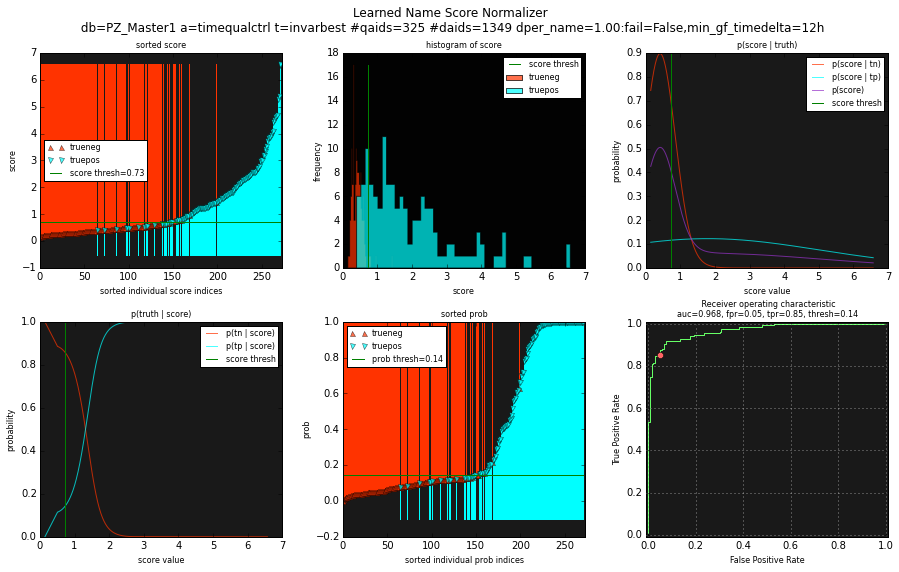

In [17]:
# Score Seperability of Good Cases where large timedelta gf are gone
test_result = ibeis.run_experiment(
    e='scores',
    db=db, 
    a=seperability_annot_cfgs, 
    t=['invarbest'],
    f=[':fail=False,min_gf_timedelta=12h']
)
_ = test_result.draw_func()

## All cases with large timedelta for groundfalse cases

Equivalent Command Line:
ibeis -e scores --db PZ_Master1 -a timequalctrl -t baseline:AQH=True,AI=False -f :fail=None,min_gf_timedelta=12h --show


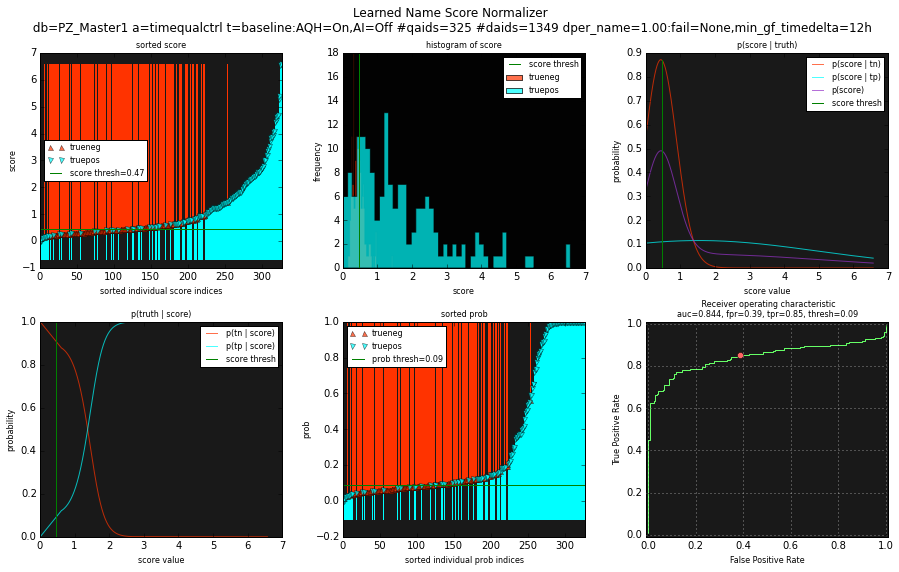

In [18]:
# Score Seperability of 
test_result = ibeis.run_experiment(
    e='scores',
    db=db, 
    a=seperability_annot_cfgs, 
    t=['baseline:AQH=True,AI=False'],
    f=[':fail=None,min_gf_timedelta=12h']
) 
_ = test_result.draw_func()

Equivalent Command Line:
ibeis -e taghist --db PZ_Master1 -a timecontrolled -t invarbest -f :fail=None,min_gf_timedelta=12h --show


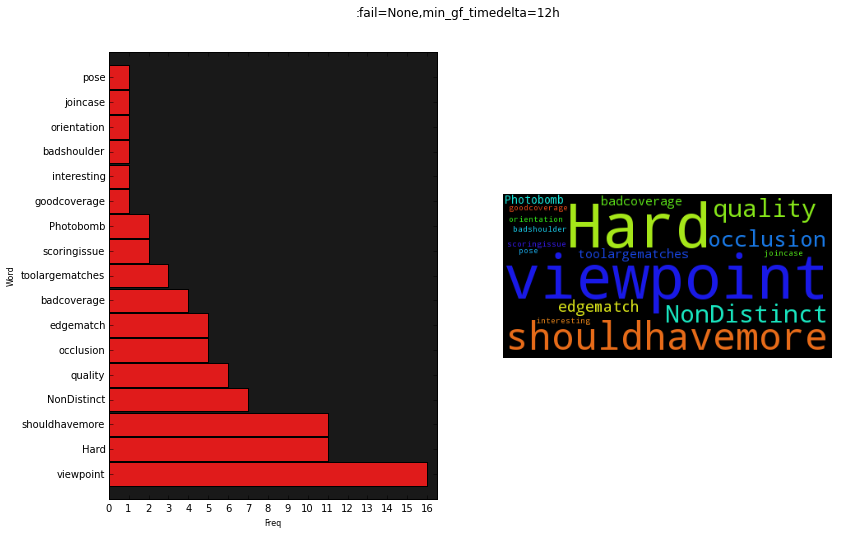

In [19]:
# Investigate the reasons for the high scoring groundfalse cases
test_result = ibeis.run_experiment(
    e='taghist',
    db=db, 
    a=['timecontrolled'], 
    t=['invarbest'],
    f=[':fail=None,min_gf_timedelta=12h']
)
_ = test_result.draw_func()

# Other

Equivalent Command Line:
ibeis -e taghist --db PZ_Master1 -a timequalctrl -t invarbest -f :fail=True,min_gf_timedelta=None --show


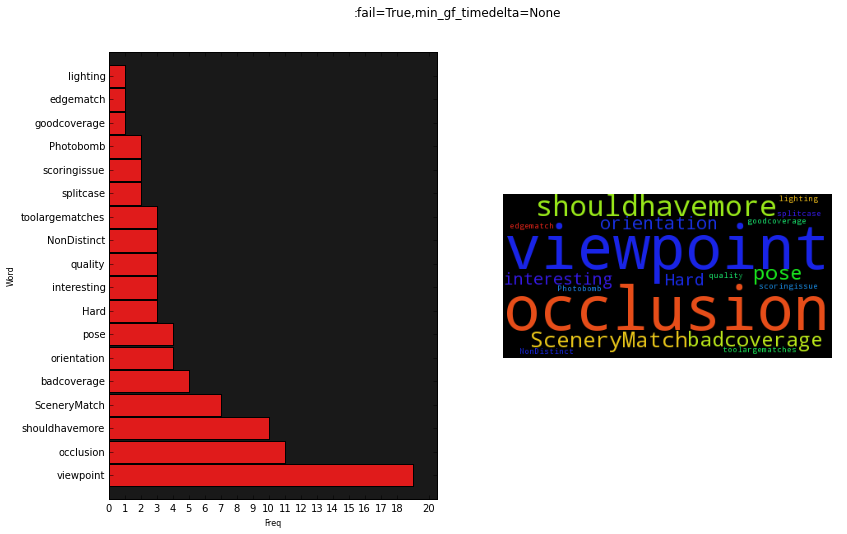

In [22]:
test_result = ibeis.run_experiment(
    e='taghist',
    db=db, 
    a=seperability_annot_cfgs, 
    t=['invarbest'],
    f=[':fail=True,min_gf_timedelta=None']
)
_ = test_result.draw_func()

Equivalent Command Line:
ibeis -e taghist --db PZ_Master1 -a timequalctrl -t invarbest -f :fail=True,min_gf_timedelta=12h --show


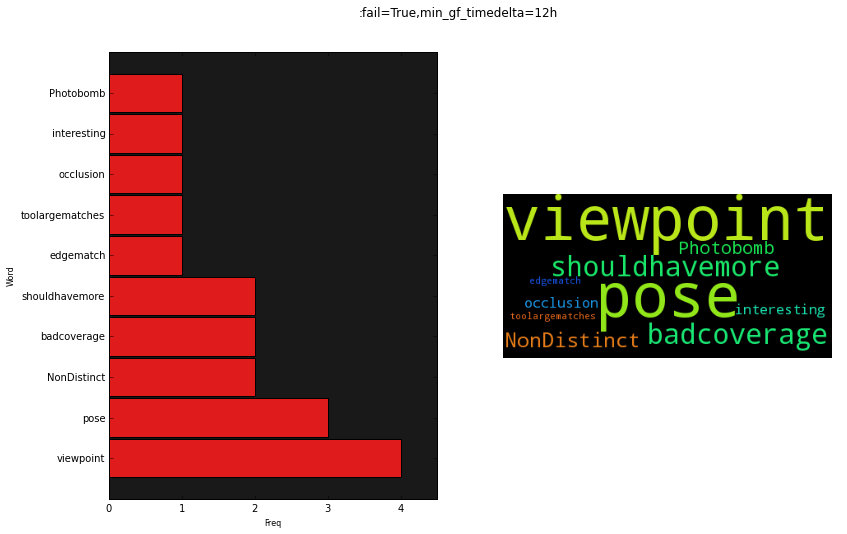

In [25]:
test_result = ibeis.run_experiment(
    e='taghist',
    db=db, 
    a=seperability_annot_cfgs, 
    t=['invarbest'],
    f=[':fail=True,min_gf_timedelta=12h']
)
_ = test_result.draw_func()